In [79]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [1]:
%matplotlib  inline

In [7]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq


### Mise au format du fichier des maillots jaunes

In [5]:
with open('vainqueurs.txt')  as file:
    lignes = file.readlines()
    

In [22]:
re_annee = r'(\d{4})'
re_vainqueur = r'1\. \w\. (.+?)2'
listev = []
for ligne in lignes: 
   # print(ligne)
    tan = re.match(re_annee, ligne)
    if tan:
        annee = tan[1]
        tnom = re.search(re_vainqueur, ligne)
        if tnom:
            if '('  in tnom[1]:
                nom = tnom[1][:-6]
            else:
                nom = tnom[1]
        else:
            nom =None
        listev.append([annee, nom])        
listev   


[['2021', 'Pogacar'],
 ['2020', 'Pogacar'],
 ['2019', 'Bernal'],
 ['2018', 'Thomas'],
 ['2017', 'Froome'],
 ['2016', 'Froome'],
 ['2015', 'Froome'],
 ['2014', 'Nibali'],
 ['2013', 'Froome'],
 ['2012', 'Wiggins'],
 ['2011', 'Evans'],
 ['2010', 'Schleck'],
 ['2009', 'Contador'],
 ['2008', 'Sastre'],
 ['2007', 'Contador'],
 ['2006', 'Pereiro Sio'],
 ['2005', None],
 ['2004', None],
 ['2003', None],
 ['2002', None],
 ['2001', None],
 ['2000', None],
 ['1999', None],
 ['1998', 'Pantani'],
 ['1997', 'Ullrich'],
 ['1996', 'Riis'],
 ['1995', 'Indurain'],
 ['1994', 'Indurain'],
 ['1993', 'Indurain'],
 ['1992', 'Indurain'],
 ['1991', 'Indurain'],
 ['1990', 'Lemo'],
 ['1989', 'Lemond'],
 ['1988', 'Delgado'],
 ['1987', 'Roche'],
 ['1986', 'Lemond'],
 ['1985', 'Hinault'],
 ['1984', 'Fignon'],
 ['1983', 'Fignon'],
 ['1982', 'Hinault'],
 ['1981', 'Hinault'],
 ['1980', 'Zoetemelk'],
 ['1979', 'Hinault'],
 ['1978', 'Hinault'],
 ['1977', 'Thevenet'],
 ['1976', 'Van Impe'],
 ['1975', 'Thevenet'],
 ['1974

In [25]:
datav = pd.DataFrame(listev, columns =['annee', 'nom'])

In [26]:
datav.head()

,annee,nom
0,2021,Pogacar
1,2020,Pogacar
2,2019,Bernal
3,2018,Thomas
4,2017,Froome


### Regrouper par nom

In [27]:
gvain = datav.groupby('nom')

In [34]:
gvain['nom'].count().nlargest(5)

nom
Anquetil    5
Hinault     5
Indurain    5
Merckx      5
Froome      4
Name: nom, dtype: int64

In [40]:
comp2 = gvain['nom'].count()

In [74]:
print(comp2.loc['Anquetil'])

5


### Charger le fichier parquet des vainqueurs d'étapes

In [48]:
data1= pd.read_parquet('vetape.parquet')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Winner          20 non-null     object
 1   Stage           20 non-null     int64 
 2   Winner_Country  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [54]:
comp2.loc['Thys']

3

In [55]:
re_nom = r' ([A-Z]\w+)'
lv = []
for item in data1['Winner'] :
    print(item)
    nom = re.search(re_nom, item)
    if nom:
       # print(nom[1])
       try:
           cherche = comp2.loc[nom[1]]
           lv.append(True)
       except:
           lv.append(False) 
print(lv)            

Philippe Thys
Louis Trousselier
Jean Aerts
Gino Bartali
Erik Zabel
Mario Cipollini
René Le Grevès
Marcel Kittel
Freddy Maertens
Charles Pélissier
Jacques Anquetil
Jean Alavoine
François Faber
Nicolas Frantz
Lance Armstrong[n 1]
André Darrigade
André Leducq
Bernard Hinault
Mark Cavendish
Eddy Merckx
[True, True, False, True, False, False, False, False, False, False, True, False, True, True, False, False, True, True, False, True]


In [56]:
data1['vainqueur'] = lv

### Visualisation

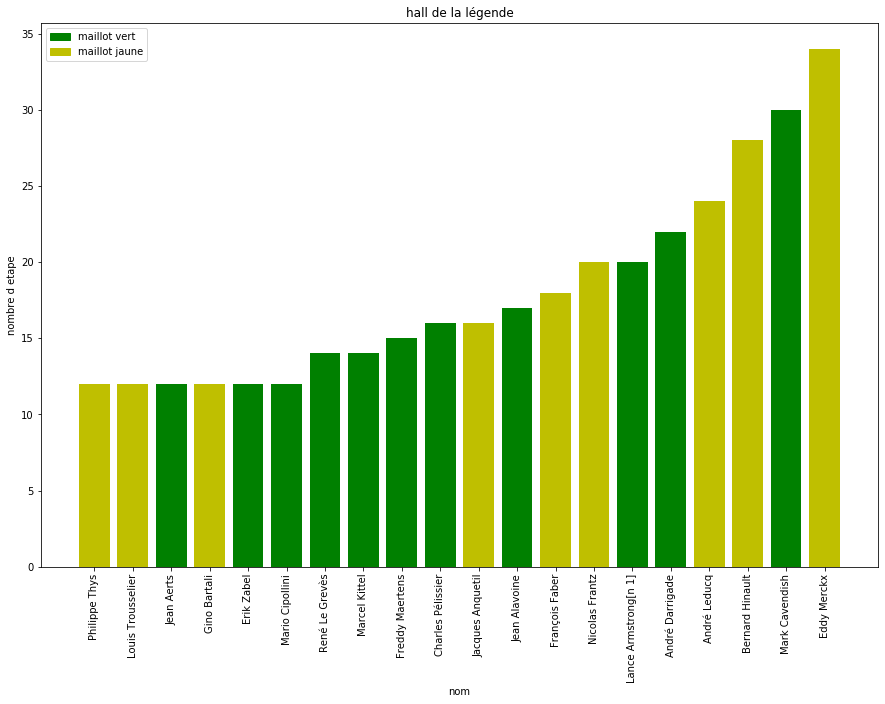

In [73]:
from matplotlib import patches as mpatches
handles = [mpatches.Patch(color='g') , mpatches.Patch(color='y')]
labels = ['maillot vert', 'maillot jaune']
           
colors = np.array(['g']*len(lv))
colors[lv] ='y'
plt.figure(figsize =(15,10))
plt.bar(data1['Winner'],data1['Stage'],color = colors, )
plt.legend(handles, labels)     
plt.xticks(rotation='vertical')
plt.xlabel('nom')
plt.ylabel('nombre d etape')
plt.title('hall de la légende')
plt.savefig('mongraphvainqueur.png')